### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

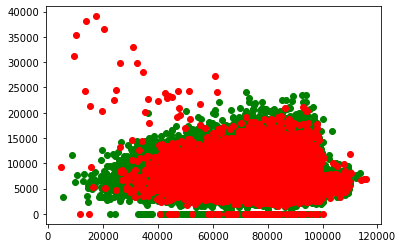

In [4]:
plt.scatter(df[df['IsBadBuy']==0]['VehOdo'], df[df['IsBadBuy']==0]['MMRCurrentRetailAveragePrice'], c='green')
plt.scatter(df[df['IsBadBuy']==1]['VehOdo'], df[df['IsBadBuy']==1]['MMRCurrentRetailAveragePrice'], c='red')

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [5]:
from sklearn.model_selection import train_test_split
df.dropna(inplace=True)
x = df[['VehOdo', 'MMRCurrentRetailAveragePrice']]
y = df['IsBadBuy']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=420)

In [6]:
from sklearn import *
model1 = linear_model.LinearRegression(fit_intercept=True, normalize=True)
model1.fit(x_train, y_train)

LinearRegression(normalize=True)

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [7]:
prediction = model1.predict(x_test)
print(prediction)

[ 0.03424366  0.03641261  0.05842461  0.0521975   0.05806976  0.01594316
  0.03218522  0.02540592  0.048175    0.05691888  0.04552975  0.04384191
  0.03347267  0.07621572  0.04415391  0.04817364  0.04972257  0.02911132
  0.03823289  0.03140635  0.05438203  0.05525734  0.04239551  0.05965473
  0.03772516  0.03260833  0.03640648  0.02560894  0.02962438  0.04524626
  0.05926161  0.05361389  0.05359989  0.03817447  0.03126894  0.05387934
  0.05411718  0.05280084  0.04438329  0.02907024  0.02554788  0.03720091
  0.02630215  0.04704237  0.04057151  0.06225637  0.02552944  0.05034546
  0.03432552  0.0496569   0.05187818  0.02939754  0.02241482  0.05103151
  0.05548914  0.02982383  0.0591112   0.06012279  0.02856306  0.05865817
  0.05628321  0.02702328  0.04635864  0.03953757  0.05888548  0.04653824
  0.04191599  0.03779272  0.05321873  0.03330774  0.0328851   0.05243835
  0.04004438  0.05909622  0.04790994  0.03880218  0.06186671  0.04050475
  0.05573955  0.02581283  0.04086263  0.05332284  0

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [8]:
predictionClass = [1 if prediction[i] > 0.05 else 0 for i in range(prediction.shape[0])]
print(predictionClass)

[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [9]:
print(metrics.classification_report(y_test.to_numpy(), predictionClass))
print(metrics.confusion_matrix(y_test.to_numpy(), predictionClass))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       955
           1       0.05      0.50      0.09        28

    accuracy                           0.71       983
   macro avg       0.51      0.61      0.46       983
weighted avg       0.95      0.71      0.81       983

[[685 270]
 [ 14  14]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [10]:
model = tree.DecisionTreeClassifier(max_depth=20)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [11]:
prediction = model.predict_proba(x_test)

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [12]:
predictionClass = [1 if prediction[i][0] == 0 else 0 for i in range(prediction.shape[0])]
print(predictionClass)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
print(metrics.classification_report(y_test.to_numpy(), predictionClass))
print(metrics.confusion_matrix(y_test.to_numpy(), predictionClass))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       955
           1       0.09      0.11      0.10        28

    accuracy                           0.94       983
   macro avg       0.53      0.54      0.53       983
weighted avg       0.95      0.94      0.95       983

[[923  32]
 [ 25   3]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [14]:
dataTrain = df.loc[0:34999,]
dataTest = df.loc[35000:69999,]
x_train = dataTrain[['VehOdo', 'MMRCurrentRetailAveragePrice']]
y_train = dataTrain['IsBadBuy']
x_test = dataTest[['VehOdo', 'MMRCurrentRetailAveragePrice']]
y_test = dataTest['IsBadBuy']

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [15]:
depth = 10
model2 = tree.DecisionTreeClassifier(max_depth=depth)

In [16]:
model2.fit(x_train, y_train)
prediction = model2.predict(x_test)
predictionClass = [1 if prediction[i] > 0.05 else 0 for i in range(prediction.shape[0])]
print(metrics.accuracy_score(y_test.to_numpy(), predictionClass))

0.9445557782231129


In [17]:
prediction = model2.predict(x_train)
predictionClass = [1 if prediction[i] > 0.05 else 0 for i in range(prediction.shape[0])]
print(metrics.accuracy_score(y_train.to_numpy(), predictionClass))

0.9861695730607336


Точность предсказания зависит от глубины: чем больше глубина, тем хуже предсказание на тестовых данных, но выше на тренировочных. Если поставить глубину слишком высокую (~20), мы встретимся с переобучением: точность на тренировочных данных будет равна 1.0, что плохо сказывается на тестовых данных. Если поставить глубину слишком низкую (~5), точность будет одинаково плоха на обоих типах данных. Поэтому оптимальным вариантом будет выбрать глубину, равную 10.

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=420)
model = tree.DecisionTreeClassifier(max_depth=20, class_weight={0:1000,1:100})
model.fit(x_train, y_train)
prediction = model.predict(x_test)
predictionClass = [1 if prediction[i] > 0.05 else 0 for i in range(prediction.shape[0])]
print(metrics.log_loss(y_test.to_numpy(), predictionClass))

2.1433315820899996


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=420)
model = tree.DecisionTreeClassifier(max_depth=20, class_weight={0:1000,1:100})
model.fit(x_train, y_train)
prediction = model.predict(x_test)
predictionClass = [1 if prediction[i] > 0.7 else 0 for i in range(prediction.shape[0])]
print(metrics.log_loss(y_test.to_numpy(), predictionClass))

2.178468485439278


In [20]:
x = df[['VehOdo', 'MMRCurrentRetailAveragePrice', 'MMRAcquisitionAuctionAveragePrice', 'VehicleAge']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=420)

In [22]:
svc_model = svm.SVC(C=1.0, kernel='poly', degree=3)
svc_model.fit(x_train, y_train)
prediction = svc_model.predict(x_test)
predictionClass = [1 if prediction[i] > 0.7 else 0 for i in range(prediction.shape[0])]
print(metrics.log_loss(y_test.to_numpy(), predictionClass))

0.9838105178611393
